In [1]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
#LOAD DATASET (DOWNLOADED FROM KAGGLE: https://www.kaggle.com/mlg-ulb/creditcardfraud)
data=pd.read_csv('creditcard.csv')

In [13]:
# Print basic info
print(data['Class'].value_counts())       

Class
0    284315
1       492
Name: count, dtype: int64


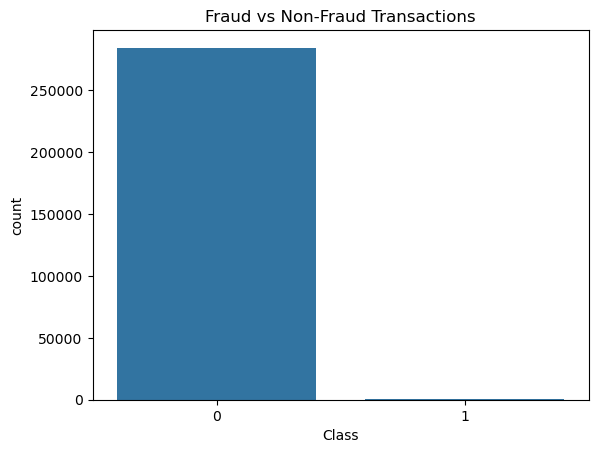

In [15]:
# Check for imbalance
sns.countplot(x='Class', data=data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

In [19]:
# Split features and labels
X = data.drop(columns=['Class', 'Time'])  # Drop 'Time' feature (not useful)
y = data['Class']

In [21]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [23]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



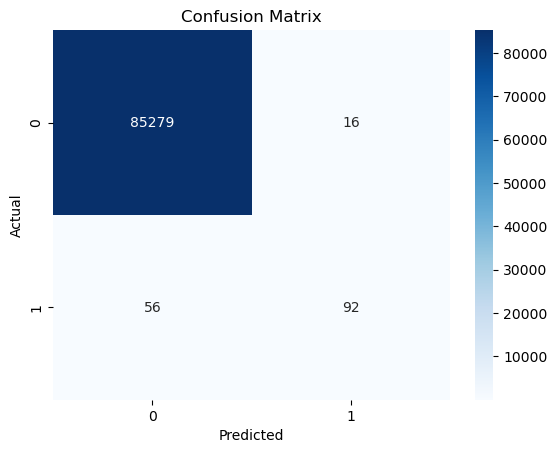

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()